# Corporate Credit Rating Forecasting 


Libraries used:
- ...
- ...
- ...


## Introduction

This notebook contains the results of the data analysis performed on a set of corporate credit ratings given by ratings agencies to a set of companies. The aim of the data analysis is to build a machine learning model from the rating data that can be used to predict the rating a company will receive.

The first section section of the notebook shows the exploratory data analysis (EDA) performed to explore and understand the data. It looks at each attribute (variable) in the data to understand the nature and distribution of the attribute values. It also examines the correlation between the variables through visual analysis. A summary at the end highlights the key findings of the EDA.

The second section shows the development of the linear regression model. It details the process used to build the model and shows the model at key points in the development process. The final model is then presented along with an analysis and interpretation of the model. This section concludes with the results of using the model to predict house prices for the data in the development dataset.

The final section provides the details of the model to enable it to be rebuilt. In addition to the model itself, it includes the functions used to transform the data and run the model.

Two datasets were provided for the assignment - training.csv and dev.csv. The exploratory data analysis and the model building were done using the training.csv dataset; the dev.csv dataset was only used to test the generated model

## The Dataset

There are xxxx features for every company. They can be divided in: <br>
- Liquidity Measurement Ratios: currentRatio, quickRatio, cashRatio, daysOfSalesOutstanding, daysOfInventoryOutstanding, operatingCycle, daysOfPayablesOutstanding, cashConversionCycle
- Profitability Indicator Ratios: grossProfitMargin, operatingProfitMargin, pretaxProfitMargin, netProfitMargin, effectiveTaxRate, returnOnAssets, returnOnEquity, returnOnCapitalEmployed, netIncomePerEBT, ebtPerEbit, ebitPerRevenue
- Debt Ratios: debtRatio, debtEquityRatio, longTermDebtToCapitalization, totalDebtToCapitalization, interestCoverage, cashFlowToDebtRatio, companyEquityMultiplier
- Operating Performance Ratios: receivablesTurnover, payablesTurnover, inventoryTurnover, fixedAssetTurnover, assetTurnover
- Cash Flow Indicator Ratios: operatingCashFlowPerShare, freeCashFlowPerShare, cashPerShare, payoutRatio, operatingCashFlowSalesRatio, freeCashFlowOperatingCashFlowRatio, cashFlowCoverageRatios, shortTermCoverageRatios, capitalExpenditureCoverageRatio, dividendPaidAndCapexCoverageRatio, dividendPayoutRatio, 
- Investment Valuation Ratios: priceBookValueRatio, priceToBookRatio, priceToSalesRatio, priceEarningsRatio, priceToFreeCashFlowsRatio, priceToOperatingCashFlowsRatio, priceCashFlowRatio, priceEarningsToGrowthRatio, priceSalesRatio, dividendYield, enterpriseValueMultiple, priceFairValue


Load the Libraries used in the notebook

In [83]:
import pandas as pd
import matplotlib.pyplot as plt
import re
import numpy as np
import seaborn as sns
from random import sample 


## Exploratory Data Analysis

### Import Dataset

In [31]:
df_rating = pd.read_csv('data/rating_dataframe.csv')

### Descriptive Data 

In [32]:
# Display the dimensions
print("The credit rating dataset has", df_rating.shape[0], "records, each with", df_rating.shape[1],
    "attributes")

The credit rating dataset has 2029 records, each with 32 attributes


Investigate class of columns.  

In [33]:
# Display the structure
df_rating.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2029 entries, 0 to 2028
Data columns (total 32 columns):
Rating                                2029 non-null object
Name                                  2029 non-null object
Symbol                                2029 non-null object
Sector                                2029 non-null object
Rating Agency Name                    2029 non-null object
Date                                  2029 non-null object
currentRatio                          2029 non-null float64
quickRatio                            2029 non-null float64
cashRatio                             2029 non-null float64
daysOfSalesOutstanding                2029 non-null float64
netProfitMargin                       2029 non-null float64
pretaxProfitMargin                    2029 non-null float64
grossProfitMargin                     2029 non-null float64
operatingProfitMargin                 2029 non-null float64
returnOnAssets                        2029 non-null float64

We have 26 columns of numerical data and 6 descriptive columns. A first look at the data:

In [34]:
df_rating.head()

,Rating,Name,Symbol,Sector,Rating Agency Name,Date,currentRatio,quickRatio,cashRatio,daysOfSalesOutstanding,...,freeCashFlowOperatingCashFlowRatio,freeCashFlowPerShare,cashPerShare,companyEquityMultiplier,ebitPerRevenue,enterpriseValueMultiple,operatingCashFlowPerShare,operatingCashFlowSalesRatio,payablesTurnover,payoutRatio
0,A,whirlpool,WHR,Consumer Durables,Egan-Jones Ratings Company,11/27/2015,0.945894,0.426395,0.099690,44.203245,...,0.437551,6.810673,9.809403,4.008012,0.049351,7.057088,15.565438,0.058638,3.906655,0.343550
1,BBB,whirlpool,WHR,Consumer Durables,Egan-Jones Ratings Company,2/13/2014,1.033559,0.498234,0.203120,38.991156,...,0.541997,8.625473,17.402270,3.156783,0.048857,6.460618,15.914250,0.067239,4.002846,0.226119
2,BBB,whirlpool,WHR,Consumer Durables,Fitch Ratings,3/6/2015,0.963703,0.451505,0.122099,50.841385,...,0.513185,9.693487,13.103448,4.094575,0.044334,10.491970,18.888889,0.074426,3.483510,0.344615
3,BBB,whirlpool,WHR,Consumer Durables,Fitch Ratings,6/15/2012,1.019851,0.510402,0.176116,41.161738,...,-0.147170,-1.015625,14.440104,3.630950,-0.012858,4.080741,6.901042,0.028394,4.581150,0.379487
4,BBB,whirlpool,WHR,Consumer Durables,Standard & Poor's Ratings Services,10/24/2016,0.957844,0.495432,0.141608,47.761126,...,0.451372,7.135348,14.257556,4.012780,0.053770,8.293505,15.808147,0.058065,3.857790,0.331081


Grouping labels

#### Analyse Labels
We will group labels to check their pattern.

In [35]:
df_rating.Rating.value_counts()

BBB    671
BB     490
A      398
B      302
AA      89
CCC     64
AAA      7
CC       5
C        2
D        1
Name: Rating, dtype: int64

We observe that the dataset is very unbalanced.
We will have to adress this issue in the Machine Learning steps. 

However now we will use the following table extracted from [investopedia](https://www.investopedia.com/terms/c/corporate-credit-rating.asp) to transform our labels. We will classify according to the grading risk. 

| Bond Rating |                   |          |            |              |
|-------------|-------------------|----------|------------|--------------|
| Moody's     | Standard & Poor's | Fitch    | Grade      | Risk         |
| Aaa         | AAA               | AAA      | Investment | Lowest Risk  |
| Aa          | AA                | AA       | Investment | Low Risk     |
| A           | A                 | A        | Investment | Low Risk     |
| Baa         | BBB               | BBB      | Investment | Medium Risk  |
| Ba, B       | BB, B             | BB, B    | Junk       | High Risk    |
| Caa/Ca      | CCC/CC/C          | CCC/CC/C | Junk       | Highest Risk |
| C           | D                 | D        | Junk       | In Default   |

In [36]:
rating_dict = {'AAA':'Lowest Risk', 
               'AA':'Low Risk',
               'A':'Low Risk',
               'BBB':'Medium Risk', 
               'BB':'High Risk',
               'B':'High Risk',
               'CCC':'Highest Risk', 
               'CC':'Highest Risk',
               'C':'Highest Risk',
               'D':'In Default'}

df_rating.Rating = df_rating.Rating.map(rating_dict)

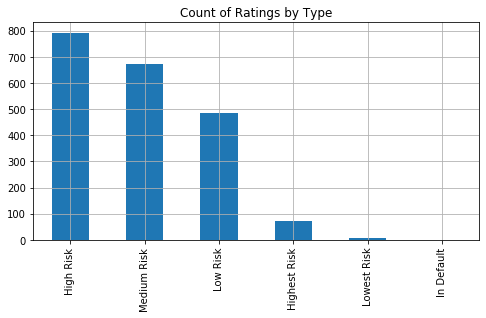

In [61]:
ax = df_rating['Rating'].value_counts().plot(kind='bar',
                                             figsize=(8,4),
                                             title="Count of Ratings by Type",
                                             grid=True)

Unfortunately given the lack of "Lowest Risk" and "In Default" companies we will have to eliminate then from the table.

In [62]:
df_rating = df_rating[df_rating['Rating']!='Lowest Risk']
df_rating = df_rating[df_rating['Rating']!='In Default']

### Descriptive Statistics

In [64]:
# Statistical summary 
df_rating.describe()

,currentRatio,quickRatio,cashRatio,daysOfSalesOutstanding,netProfitMargin,pretaxProfitMargin,grossProfitMargin,operatingProfitMargin,returnOnAssets,returnOnCapitalEmployed,...,freeCashFlowOperatingCashFlowRatio,freeCashFlowPerShare,cashPerShare,companyEquityMultiplier,ebitPerRevenue,enterpriseValueMultiple,operatingCashFlowPerShare,operatingCashFlowSalesRatio,payablesTurnover,payoutRatio
count,2021.000000,2021.000000,2021.000000,2021.000000,2021.000000,2021.000000,2021.000000,2021.000000,2021.000000,2021.000000,...,2021.000000,2.021000e+03,2.021000e+03,2021.000000,2021.000000,2021.000000,2.021000e+03,2021.000000,2021.000000,2021.000000
mean,3.535411,2.657150,0.669048,334.855415,0.278725,0.432721,0.496900,0.588793,-37.666843,-74.267283,...,0.408272,5.114871e+03,4.244248e+03,3.335166,0.438715,48.426558,6.540891e+03,1.452142,38.138233,-0.087402
std,44.139386,33.009920,3.590902,4456.606352,6.076128,9.002733,0.525996,11.246798,1168.476782,2354.920503,...,3.803929,1.472059e+05,1.226418e+05,87.702375,9.002047,530.161001,1.778797e+05,19.521704,760.421855,40.523595
min,-0.932005,-1.893266,-0.192736,-811.845623,-101.845815,-124.343612,-14.800817,-124.343612,-40213.178290,-87162.162160,...,-120.916010,-4.912742e+03,-1.915035e+01,-2555.419643,-124.343612,-3749.921337,-1.195049e+04,-4.461837,-76.662850,-1735.047170
25%,1.071930,0.602298,0.131433,22.806507,0.020894,0.025649,0.232565,0.044546,0.018757,0.028112,...,0.269616,4.094118e-01,1.562116e+00,2.050249,0.028057,6.235759,2.348851e+00,0.073664,2.202394,0.000000
50%,1.492804,0.979094,0.297859,42.281804,0.064323,0.084965,0.414217,0.107640,0.045417,0.074639,...,0.644265,2.123062e+00,3.680425e+00,2.657275,0.087424,9.269746,4.361649e+00,0.132758,5.775840,0.212225
75%,2.160710,1.450457,0.625355,59.165369,0.113871,0.144763,0.849693,0.175334,0.077159,0.135036,...,0.836949,4.230253e+00,8.027524e+00,3.665438,0.149355,12.898855,7.322553e+00,0.239359,9.500424,0.465530
max,1725.505005,1139.541703,125.917417,115961.637400,198.517873,309.694856,2.702533,410.182214,0.487826,2.439504,...,34.594086,5.753380e+06,4.786803e+06,2562.871795,309.694856,11153.607090,6.439270e+06,688.526591,20314.880400,412.136640


We observe a lot of skewness in the data with this first exploration. There is very little variation within the interquartile but the max and the min are very distant from the interquartile. The dataset is polluted with outliers. 
We will demonstrate with histograms and boxplots of four chosen variables.

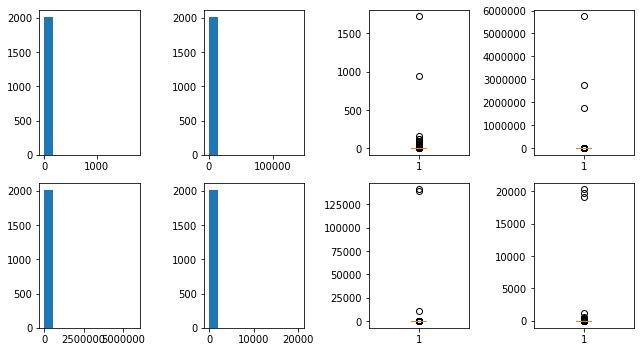

In [75]:
figure, axes = plt.subplots(nrows=2, ncols=4, figsize=(9,5))
axes[0, 0].hist(df_rating.currentRatio)
axes[0, 1].hist(df_rating.returnOnEquity)
axes[1, 0].hist(df_rating.freeCashFlowPerShare)
axes[1, 1].hist(df_rating.payablesTurnover)

axes[0, 2].boxplot(df_rating.currentRatio)
axes[1, 2].boxplot(df_rating.returnOnEquity)
axes[0, 3].boxplot(df_rating.freeCashFlowPerShare)
axes[1, 3].boxplot(df_rating.payablesTurnover)

figure.tight_layout()

We will use the function `.skew` from pandas in all columns. It should return between 0 and 1 if a column is normally distributed. 

In [76]:
df_rating.skew(axis=0)

currentRatio                          34.271115
quickRatio                            30.864610
cashRatio                             27.046952
daysOfSalesOutstanding                20.359098
netProfitMargin                       17.585073
pretaxProfitMargin                    22.052558
grossProfitMargin                    -14.198688
operatingProfitMargin                 26.441502
returnOnAssets                       -32.049111
returnOnCapitalEmployed              -33.252701
returnOnEquity                        31.639845
assetTurnover                         25.968848
fixedAssetTurnover                    26.068762
debtEquityRatio                        0.268074
debtRatio                              1.284256
effectiveTaxRate                      32.265705
freeCashFlowOperatingCashFlowRatio   -22.868222
freeCashFlowPerShare                  33.610677
cashPerShare                          33.958646
companyEquityMultiplier                0.268175
ebitPerRevenue                        22

As we can see almost all columns are extremely skewed. We will perform now transformations in the dataset to handle the skewness. An apprpriate method is usually to apply log or delete outliers, but we will follow a different approach. First we will perform an investigation of the data within the classes. 

In [82]:
df_rating.groupby('Rating').median()

,currentRatio,quickRatio,cashRatio,daysOfSalesOutstanding,netProfitMargin,pretaxProfitMargin,grossProfitMargin,operatingProfitMargin,returnOnAssets,returnOnCapitalEmployed,...,freeCashFlowOperatingCashFlowRatio,freeCashFlowPerShare,cashPerShare,companyEquityMultiplier,ebitPerRevenue,enterpriseValueMultiple,operatingCashFlowPerShare,operatingCashFlowSalesRatio,payablesTurnover,payoutRatio
Rating,,,,,,,,,,,,,,,,,,,,,
High Risk,1.658488,1.105294,0.336215,43.894020,0.035028,0.043417,0.374811,0.073341,0.027916,0.043071,...,0.636441,1.333805,3.293783,2.758037,0.044425,8.920671,2.797530,0.107241,6.260503,0.000000
Highest Risk,1.587039,1.026375,0.375458,40.173557,-0.043047,-0.047269,0.827221,0.012483,-0.019987,-0.016542,...,0.771947,0.007281,3.849680,3.354741,-0.040075,8.739748,1.315617,0.048700,1.865682,0.000000
Low Risk,1.354468,0.872729,0.265012,39.902746,0.094578,0.127175,0.502950,0.142032,0.071791,0.135035,...,0.692668,3.263620,4.311189,2.500230,0.130094,9.816527,5.930780,0.152270,5.205684,0.349872
Medium Risk,1.433680,0.929725,0.277880,42.373491,0.073023,0.092640,0.384978,0.119031,0.048949,0.081951,...,0.604912,2.417054,3.654395,2.675544,0.095435,9.202408,5.072782,0.145493,5.762747,0.288312


From the table we can see there is a difference in the means of each of the financial indicators with respect to the classes. Therefore, it might be worth to consider the distribution of each indicator whithin each class separetedly.

### Outlier Handling

We will do the following approach:

1. Analyse each of the variables according to each class.
2. Detect outliers.
3. Replace the outliers a random variable from the same class from the same variable.

In [529]:





    df_out = df_input[0:0].copy()
    
    for c in ratings:
    
        df_in = df_input.loc[df_input.Rating  ==  c].copy()
        q1 = df_in[col_name].quantile(0.25)
        q3 = df_in[col_name].quantile(0.75)
        q5 = df_in[col_name].quantile(0.5)
        iqr = q3-q1 #Interquartile range
        fence_low  = q3-1.5*iqr
        fence_high = q1+1.5*iqr
    
        df_in.loc[(df_in[col_name] < fence_low),col_name] = sample(list(df_in.loc[(df_in[col_name] > fence_low) & 
                                                                                  (df_in[col_name] < q5),
                                                                                  col_name]),
                                                                   len(df_in.loc[(df_in[col_name] < fence_low),col_name]))
    
    
        df_in.loc[(df_in[col_name] > fence_high),col_name] = sample(list(df_in.loc[(df_in[col_name] > q5) & 
                                                                                  (df_in[col_name] < fence_high),
                                                                                  col_name]),
                                                                    len(df_in.loc[(df_in[col_name] > fence_high),col_name]))
    
        frames = [df_out, df_in]
        df_out = pd.concat(frames) 

    return df_out

In [530]:
for c in df_rating.columns[6:31]:
    df_rating = remove_outlier(df_rating, c)

ValueError: Sample larger than population or is negative

In [ ]:
figure, axes = plt.subplots(nrows=2, ncols=4, figsize=(9,5))
axes[0, 0].hist(df_rating.currentRatiolog)
axes[0, 1].hist(df_rating.returnOnEquitylog)
axes[1, 0].hist(df_rating.freeCashFlowPerSharelog)
axes[1, 1].hist(df_rating.payablesTurnoverlog)

axes[0, 2].boxplot(df_rating.currentRatiolog)
axes[1, 2].boxplot(df_rating.returnOnEquitylog)
axes[0, 3].boxplot(df_rating.freeCashFlowPerSharelog)
axes[1, 3].boxplot(df_rating.payablesTurnoverlog)

figure.tight_layout()

# Analyse Relations

In [569]:
df_rating.colors = 'a'
df_rating.loc[df_rating['Rating'] == 'A', 'color'] = 'r'
df_rating.loc[df_rating['Rating'] == 'B', 'color'] = 'g'
df_rating.loc[df_rating['Rating'] == 'BB', 'color'] = 'b'
df_rating.loc[df_rating['Rating'] == 'BBB','color'] = 'y'
df_rating.loc[df_rating['Rating'] == 'C', 'color'] = 'm'


ValueError: 'c' argument must be a mpl color, a sequence of mpl colors or a sequence of numbers, not 0         r
1         y
2         y
3         y
4         y
       ... 
2024      y
2025      b
2026      g
2027      g
2028    NaN
Name: color, Length: 2029, dtype: object.

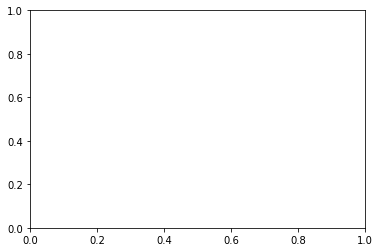

In [570]:
plt.scatter(df_rating.returnOnAssets, df_rating.returnOnCapitalEmployed, c = df_rating.color, alpha=0.5)
plt.show()

In [571]:
df_rating.groupby('Rating').mean()

,currentRatio,quickRatio,cashRatio,daysOfSalesOutstanding,netProfitMargin,pretaxProfitMargin,grossProfitMargin,operatingProfitMargin,returnOnAssets,returnOnCapitalEmployed,...,freeCashFlowOperatingCashFlowRatio,freeCashFlowPerShare,cashPerShare,companyEquityMultiplier,ebitPerRevenue,enterpriseValueMultiple,operatingCashFlowPerShare,operatingCashFlowSalesRatio,payablesTurnover,payoutRatio
Rating,,,,,,,,,,,,,,,,,,,,,
A,1.538695,1.327016,0.385079,171.168722,0.590435,0.863640,0.556080,1.040302,0.071436,0.136976,...,0.573076,26.161248,48.874806,3.780445,0.866412,10.939248,103.318712,1.495428,6.774101,0.286710
AA,1.723888,1.227023,0.390321,40.635753,0.124043,0.165942,0.627899,0.173166,0.092874,0.172885,...,0.902069,83.025380,184.041180,2.222550,0.166796,10.532753,462.707627,0.189398,670.839163,0.446723
AAA,2.274625,2.063972,0.274089,67.678733,0.212323,0.117229,0.734484,0.274609,0.109992,0.071989,...,0.776531,3.961642,9.923552,2.082451,0.117229,12.204365,5.682929,0.346676,3.784628,0.487933
B,5.431595,1.830320,0.634058,67.385079,0.141831,0.211195,0.499278,0.248749,-118.765198,-208.882685,...,0.027576,52.968464,90.703789,-6.805406,0.218886,148.564115,-13.168759,0.639844,8.048441,0.317992
BB,2.579726,6.165528,0.937828,950.263229,-0.281538,-0.334636,0.446694,-0.225784,-0.226759,0.051039,...,0.367777,9234.334962,7497.555030,1.489030,-0.329640,73.942903,13585.272504,1.679154,12.551026,1.850422
BBB,1.753954,1.242471,0.419345,171.933980,0.641484,0.953623,0.460779,1.207154,0.051597,0.091791,...,0.499515,8604.119826,7193.585692,5.176333,0.961297,11.801629,9662.001115,1.942878,7.631958,0.591676
C,1.286105,0.635879,0.578643,3.644017,0.449925,0.722794,0.515868,0.099135,0.067283,0.395384,...,-1.524296,-0.933089,5.808174,5.638925,0.722794,8.085984,0.537463,0.022305,9.472004,-0.034032
CC,1.110003,0.672340,0.379967,15.830629,-0.549850,-0.610106,0.769635,-0.570298,-8042.909871,-17432.871752,...,0.298548,1212.370650,10.393418,-1.859115,-0.610106,4.093561,-269.074276,0.029997,2.022818,-0.003721
CCC,35.778208,5.008539,3.573252,55.744425,-0.253064,-0.344592,0.676688,-0.177128,-0.052983,-0.070988,...,-0.084502,-13.928158,213.115198,45.128958,-0.328738,55.076877,33.971570,0.044647,14.779026,-27.034016


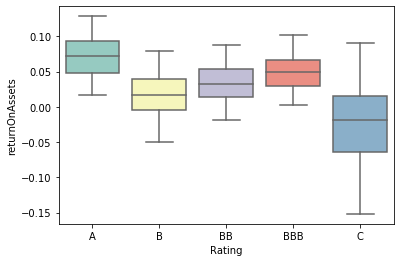

In [299]:
import seaborn as sns

# ax = sns.boxplot(x=df_rating.Rating, y=df_rating.currentRatio,palette="Set3")
# ax = sns.boxplot(x=df_rating.Rating, y=df_rating.quickRatio,palette="Set3")
# ax = sns.boxplot(x=df_rating.Rating, y=df_rating.daysOfSalesOutstanding,palette="Set3")
ax = sns.boxplot(x=df_rating.Rating, y=df_rating.returnOnAssets,palette="Set3")

# Boxplot

In [300]:
df_plot = df_rating.copy()
df_plot = df_plot.iloc[:,0:32]
df_plot.drop(df_plot.columns[1:6], axis = 1, inplace = True)

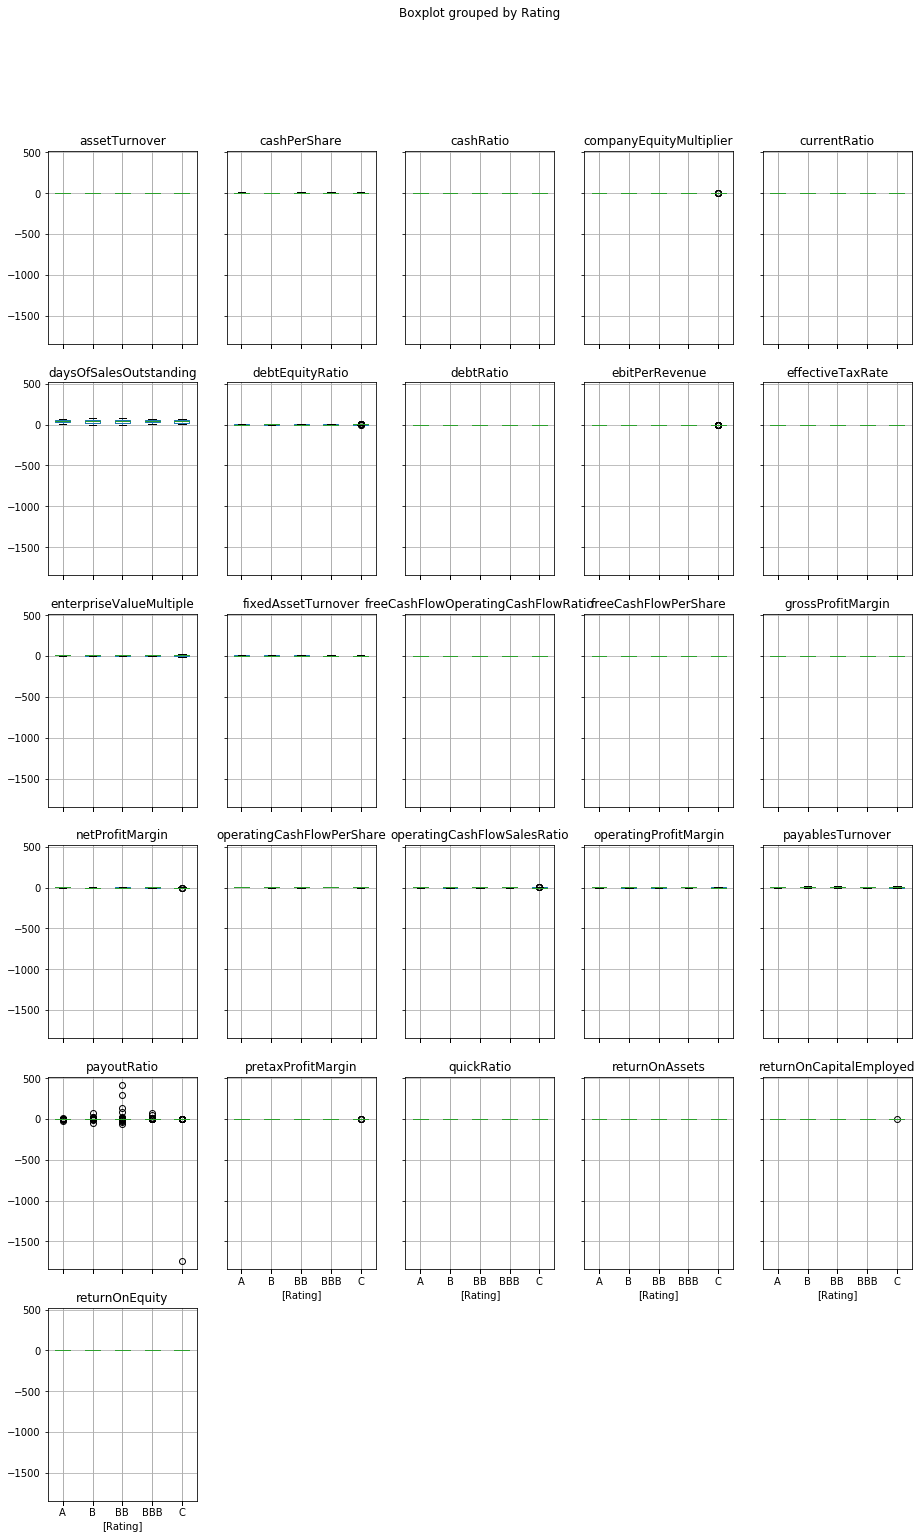

In [301]:
boxplot = df_plot.boxplot(by='Rating', figsize=(15,25))

# PCA

In [302]:
df_rating.columns[32]

'currentRatiolog'

In [303]:
from sklearn.preprocessing import StandardScaler

In [304]:
features = df_rating.columns[6:32]

# Separating out the features
x = df_rating.loc[:, features].values
# Separating out the target
y = df_rating.loc[:,['Rating']].values
# Standardizing the features
# x = StandardScaler().fit_transform(x)

In [305]:
from sklearn.decomposition import PCA
pca = PCA(n_components=5)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents, columns = ['pca1', 'pca2','pca3','pca4','pca5'])

In [306]:
finalDf = pd.concat([principalDf, df_rating[['Rating']]], axis = 1)

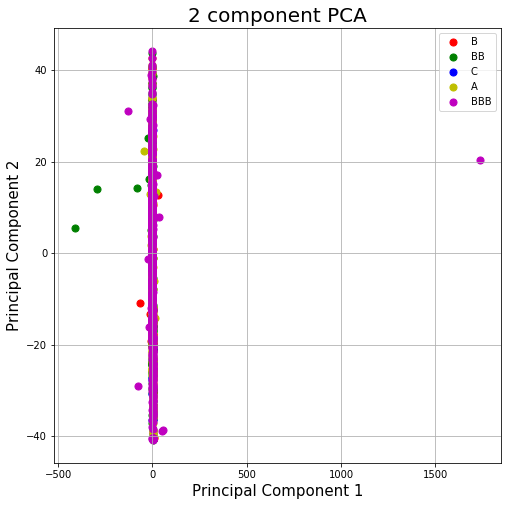

In [307]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = list(set(df_rating.Rating))
colors = ['r', 'g', 'b','y', 'm']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['Rating'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'pca1'], 
               finalDf.loc[indicesToKeep, 'pca2'], 
               c = color, 
               s = 50)

ax.legend(targets)
ax.grid()

In [308]:
sum(pca.explained_variance_ratio_)

0.9915312978518638

In [309]:
# Load libraries
from sklearn.linear_model import LogisticRegression
from sklearn import datasets
from sklearn.preprocessing import StandardScaler

In [311]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# XGBOOST

In [687]:
# Separate majority and minority classes
df_A = df_rating[df_rating.Rating == 'AA']
df_AA = df_rating[df_rating.Rating == 'AA']
df_B = df_rating[df_rating.Rating == 'B']
df_BB = df_rating[df_rating.Rating == 'BB']
df_BBB = df_rating[df_rating.Rating == 'BBB']
df_CCC = df_rating[df_rating.Rating == 'CCC']
df_upsampled = pd.concat([df_A, df_AA, df_AAA, df_B, df_BB, df_BBB, df_CCC])

len(df_BBB)

671

In [688]:
X, y = df_upsampled.iloc[:,6:32], df_upsampled.iloc[:,0]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [689]:
from sklearn.utils import resample

# Upsample minority class
df_A = resample(df_A, replace=True, n_samples=671, random_state=123) 
df_AA = resample(df_AA, replace=True, n_samples=671, random_state=123) 
df_AAA = resample(df_AAA, replace=True, n_samples=671, random_state=123) 
df_B = resample(df_B, replace=True, n_samples=671, random_state=123) 
df_BB = resample(df_BB, replace=True, n_samples=671, random_state=123) 
df_C = resample(df_C, replace=True, n_samples=671, random_state=123) 
df_CC = resample(df_CC, replace=True, n_samples=671, random_state=123) 
df_CCC = resample(df_CCC, replace=True, n_samples=671, random_state=123) 

# Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_A, df_AA, df_AAA, df_B, df_BB, df_BBB, df_CCC])


In [690]:
from sklearn.datasets import make_classification
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split

In [691]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit

X, y = df_upsampled.iloc[:,6:32], df_upsampled.iloc[:,0]

In [692]:
X_train, _, y_train, _ = train_test_split(X, y, test_size=0.2, random_state=42)

In [693]:
clf = GradientBoostingClassifier(random_state=0)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
clf.score(X_test, y_test)

0.8659217877094972

In [694]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[ 61,   2,   0,   0,   2,  10,   0],
       [  0,  29,   0,   0,   0,   0,   0],
       [  0,   0, 129,   0,   0,   0,   0],
       [  0,   0,   0,  54,   4,   3,   0],
       [  3,   3,   0,  10,  68,   9,   0],
       [ 11,   0,   0,   5,   9, 112,   1],
       [  0,   0,   0,   0,   0,   0,  12]], dtype=int64)

# Support Vector Machine

In [695]:
from sklearn import svm
clf = svm.SVC(kernel='rbf', gamma= 2, C = 5)
clf = clf.fit(X_train, y_train)

In [696]:
y_pred = clf.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8994413407821229


# NN

In [697]:
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(hidden_layer_sizes=(5,5,5), activation='logistic', solver='adam', max_iter=500).fit(X_train, y_train)
clf = clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.4208566108007449


# Naive Bayes

In [698]:
from sklearn.naive_bayes import GaussianNB
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
gnb = GaussianNB()
y_pred = gnb.fit(X_train, y_train).predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.25139664804469275


# KNN

In [699]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=15)
neigh.fit(X_train,y_train)
y_pred = neigh.predict(X_test)

In [700]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.5493482309124768


# Logistic Regression

In [701]:
from sklearn.linear_model import LogisticRegression
# X_train, y_test = load_iris(return_X_y=True)
clf = LogisticRegression(random_state=0 , multi_class='multinomial', solver='newton-cg')
model = clf.fit(X_train, y_train)

C:\Users\hp\Anaconda3\lib\site-packages\sklearn\utils\optimize.py:203: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)


In [702]:
y_pred= model.predict(X_test)

In [703]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.4338919925512104


# Random Forest

In [704]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)

In [705]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9329608938547486


### LDA

In [706]:
import numpy as np
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
clf = LinearDiscriminantAnalysis()
clf.fit(X_train,y_train)

LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
                           solver='svd', store_covariance=False, tol=0.0001)

In [707]:
y_pred=clf.predict(X_test)

In [708]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.4376163873370577


# QDA

In [709]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
clf = QuadraticDiscriminantAnalysis()
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)

C:\Users\hp\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:693: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


In [710]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.3929236499068901
